Оцінювання наявності даної роботи буде враховувати як наявність самих візуалізацій (вони можуть незначно відрізнятися від прикладів, але повинні змістовно відображати суть задачі) та опис отриманих вами результатів. При наявності ЛИШЕ візуалізацій без роз'яснень, завдання не буде зараховане за наявне.

Під час виконання вам дозволено користуватися будь-якими зручними для вас Python бібліотеками для візуалізації.

# I. Receiving Data.

In [2]:
# cell for imports. All imports must go here.
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

1. (2б) Для виконання цієї лабораторної роботи Вам необхідно скористатися вибіркою titanic ([train.csv](https://www.kaggle.com/c/titanic/data?select=train.csv)). Зчитайте його та збережіть його у змінну, щоб у подальшому її використати для візуалізацій. Виведіть інформацію про кожну колонку, її індекс, тип та кількість непропущених значень та перші кілька рядків датафрейму.


In [8]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [9]:
titanic = pd.read_csv("/content/drive/MyDrive/train.csv")
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [10]:
titanic.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


# IІ. Data Visualization.

2. (10б) Створіть pie chart, який би показував співвідношення виживших до загиблих.

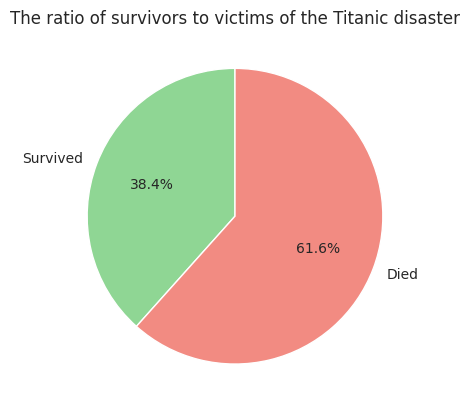

In [23]:
survived = titanic["Survived"].sum()/titanic.shape[0]
fig, ax = plt.subplots()

ax = plt.pie([survived, 1 - survived], labels=['Survived', 'Died'], autopct='%1.1f%%', startangle=90, colors=['#8fd694', '#f28b82'])
plt.title('The ratio of survivors to victims of the Titanic disaster')
plt.show()

Можемо побачити, що трохи більше третини пасажирів вижили. Оскільки можливих варіантів лише два — вижив або загинув — кругова діаграма є цілком доречною. Вона добре передає суть, особливо завдяки відображенню відсотків, що дозволяє швидко оцінити пропорції й отримати наочне уявлення про ситуацію.

3. (20б) Створіть bar chart, який би показував співвідношення загиблих до виживших для кожної статі. Для groupby використовуйте атрибут as_index=False.


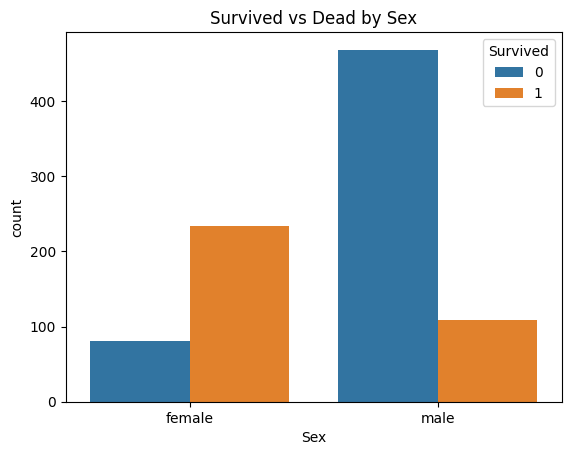

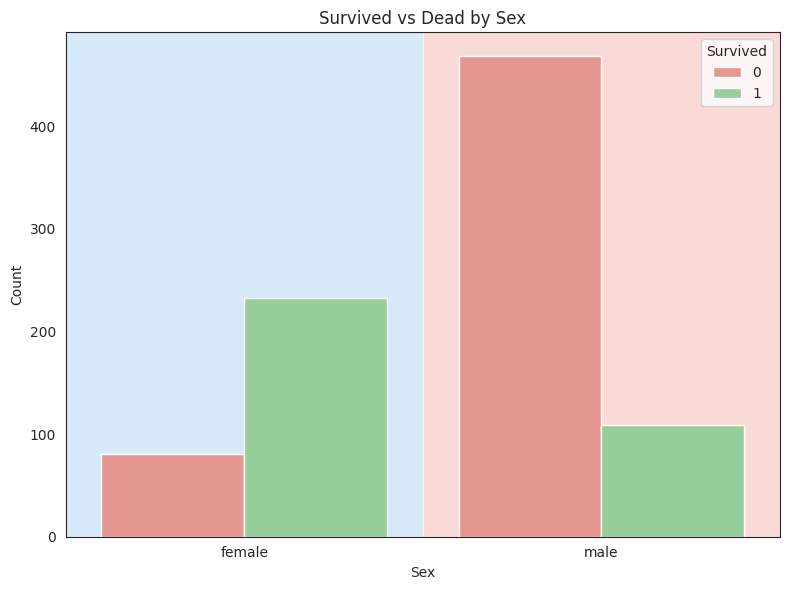

In [21]:
sns.set_style(style='white')
same_order = titanic.sort_values(by="Sex")

fig, ax = plt.subplots(figsize=(8, 6))
ax.axvspan(-0.5, 0.5, facecolor='#aed6f1', alpha=0.5)
ax.axvspan(0.5, 1.5, facecolor='#f5b7b1', alpha=0.5)
survived_sex = sns.countplot(x='Sex', data=same_order, hue='Survived', palette={0: '#f28b82', 1: '#8fd694'}, ax=ax)
plt.title("Survived vs Dead by Sex")
plt.xlabel("Sex")
plt.ylabel("Count")
plt.tight_layout()
plt.show()

Вже працюючи не вперше з даним датасетом та після обговорення результатів на іншому курсі ми дійшли висновку, що в пріорітеті рятували жінок та дітей через обмежену кількість човнів, що пояснює співвідношення на графіку.

4. (20б) Відобразіть кількість пропущених значень в датасеті по кожній із змінних.

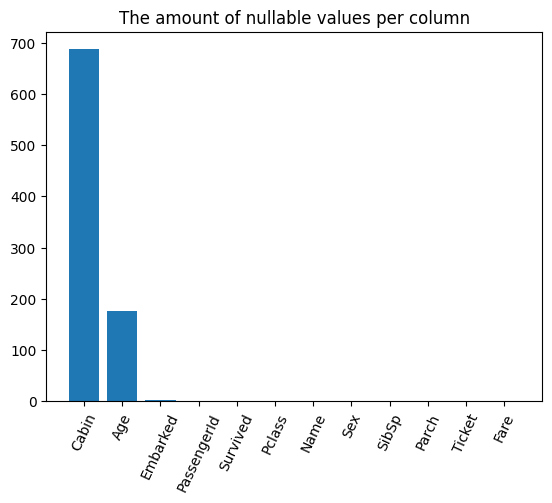

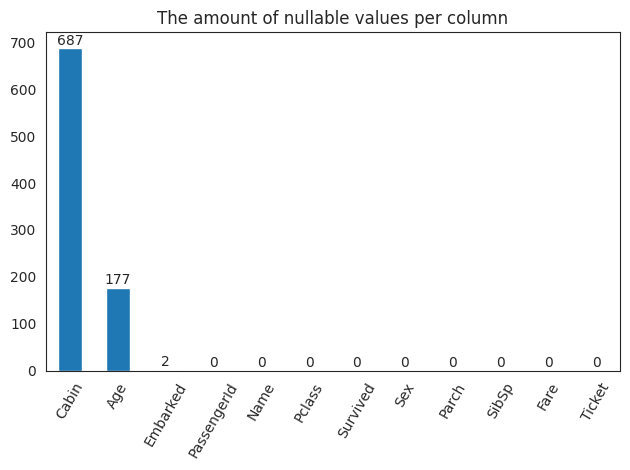

In [27]:
fig, ax = plt.subplots(1, 1)
titanic_null = titanic.isna().sum().sort_values(ascending=False)
bars = titanic_null.plot(kind="bar", linewidth=1, ax=ax)

plt.xticks(rotation=60)
plt.title("The amount of nullable values per column")
for i, value in enumerate(titanic_null):
    ax.text(i, value + 1, str(value), ha='center', va='bottom')
plt.tight_layout()
plt.show()

Найбільше пропушених значень в каюті проживання людей та віці. Додала підписи з кількістю, оскільки вище бачили Embarked 889 non-null з 291

5. (10б) Побудуйте наступний графік, дайте йому назву та опишіть, що власне на них відображається.

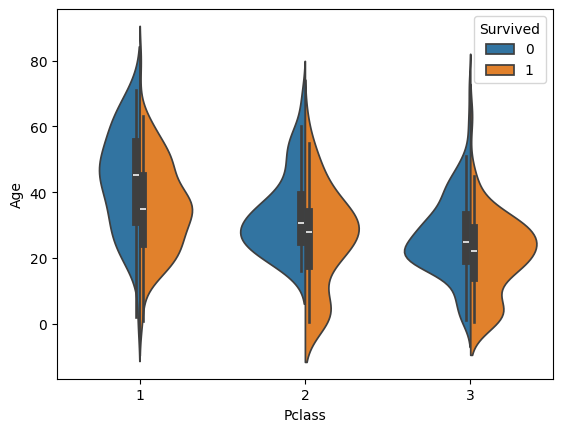

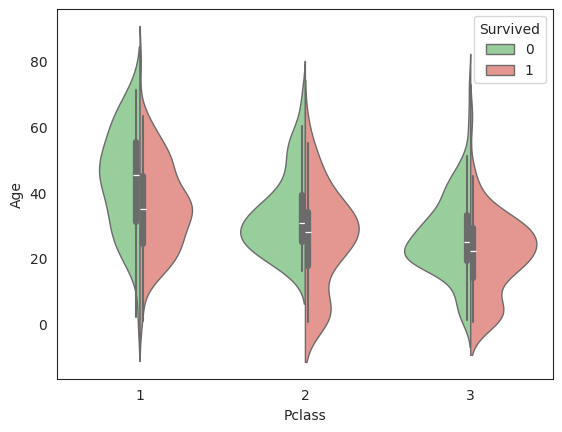

In [30]:
fig, ax = plt.subplots(1, 1)
ax=sns.violinplot(data=titanic, x="Pclass", y="Age", hue="Survived", palette=['#8fd694', '#f28b82'], split=True, linewidth=1)
plt.show()

З цього графіку можна побачити, що в першому класі було менше дітей, а в цілому пасажири цього класу були старші. Однак серед тих, хто вижив, були в основному молодші особи, ніж серед загиблих. Другий клас відзначався значною кількістю дітей, і майже всі до 14 років вижили. Різниця між середнім віком загиблих і врятованих у другому і третьому класах була значно меншою, ніж у першому. У третьому класі наймолодші пасажири, зокрема більше дітей, серед яких, на жаль, є й загиблі.

6. (13б) Побудуйте графік розподілу частот по віку пасажирів.


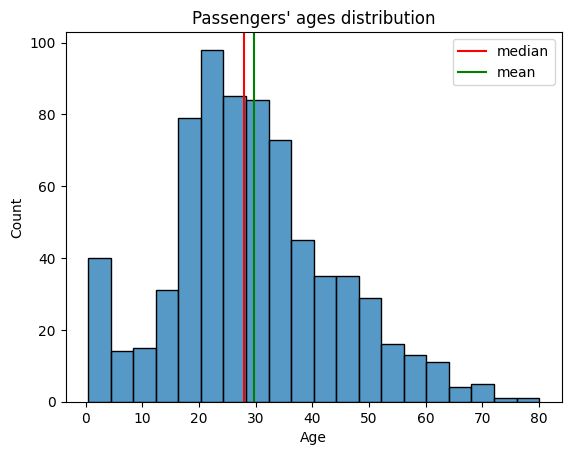

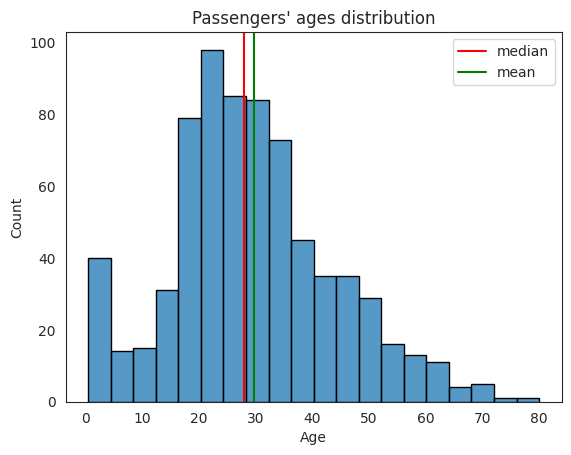

In [31]:
fig, ax = plt.subplots(1, 1)
ax = sns.histplot(titanic, x="Age", bins=20, edgecolor = "black")
ax.axvline(x=titanic["Age"].median(), color = "red", label = "median")
ax.axvline(x=titanic["Age"].mean(), color = "green", label = "mean")
plt.title("Passengers' ages distribution")
ax.legend()
plt.show()

На графіку видно, як саме розподілявся вік пасажирів. Середні значення віку (середнє, медіана) розташовані трохи нижче позначки 30, що свідчить про відносно молодий склад пасажирів.

7. (25б) Поставте бізнес-питання до даних. Дайте на нього відповідь за допомогою візуалізацій. Прокоментуйте отриману відповідь.

Чи є залежність між кількістю виживших\померлих та класом квитка?

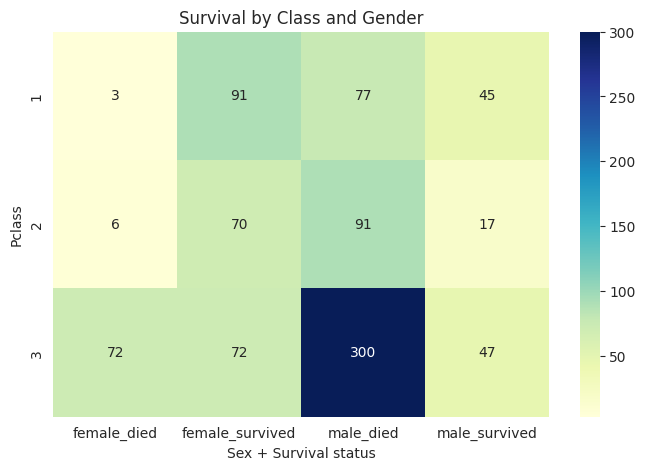

In [36]:
titanic['Status'] = titanic['Sex'] + '_' + titanic['Survived'].map({0: 'died', 1: 'survived'})
heatmap_data = pd.crosstab(titanic['Pclass'], titanic['Status'])

plt.figure(figsize=(8, 5))
sns.heatmap(heatmap_data, annot=True, fmt='d', cmap="YlGnBu")
plt.title('Survival by Class and Gender')
plt.ylabel('Pclass')
plt.xlabel('Sex + Survival status')
plt.show()

Можемо побачити, що найбільша кількість померлих - чоловіки (у відсотковому співвідношенні також) з найнижчим класом квитка, а найбільша кількість виживших - жінки з 1 класом квитка.

# Вітаю! Ви велика(ий) молодець, що впоралась(вся). Похваліть себе та побалуйте чимось приємним. Я Вами пишаюся.

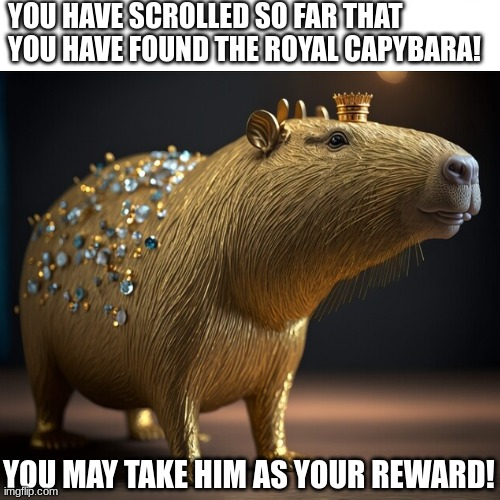